<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(0919).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 텐서플로 설치

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = \
tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 이미지 보기

In [4]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [5]:
y_train[0]  # 훈련용 이미지 0번의 숫자

5

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 0과 1만 추리기

In [7]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)

In [8]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [11]:
Image.fromarray(x_train2[1])

### 텐서플로 모형 정의

In [12]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(),
    Dense(1, activation='sigmoid'),
])

### 설정과 훈

In [18]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10)

Epoch 1/10
357/357 [==============================] - 5s 6ms/step - loss: 0.3204 - accuracy: 0.9913 - val_loss: 0.0329 - val_accuracy: 0.9984
Epoch 2/10
357/357 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9973 - val_loss: 0.0285 - val_accuracy: 0.9992
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9981 - val_loss: 0.0225 - val_accuracy: 0.9984
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9980 - val_loss: 0.0222 - val_accuracy: 0.9992
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0417 - accuracy: 0.9988 - val_loss: 0.0199 - val_accuracy: 0.9976
Epoch 6/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9984 - val_loss: 0.0500 - val_accuracy: 0.9961
Epoch 7/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9985 - val_loss: 0.0061 - val_accuracy: 0.9992
Epoch 

손실함수 loss: 예측이 부정확한 정도를 평가하는 방법
- 이항 분류 문제이므로 binary_crossentropy를 사용
- 둘 중에 하나를 어떤 확률로 맞췄냐
- accuracy:확률이 큰 쪽으로 예측하여 맞은 개수

•배치(batch): 한 번에 모형의 파라미터 조정에 사용하는 데이터 기본 32 개
•
에포크(epoch): 전체 데이터를 한 번 처음부터 끝까지 훑는 과정 (800=32 × 25)
•에포크를 거듭할 수록 손실 (loss) 은 감소 , 정확도 (accuracy)는 향상


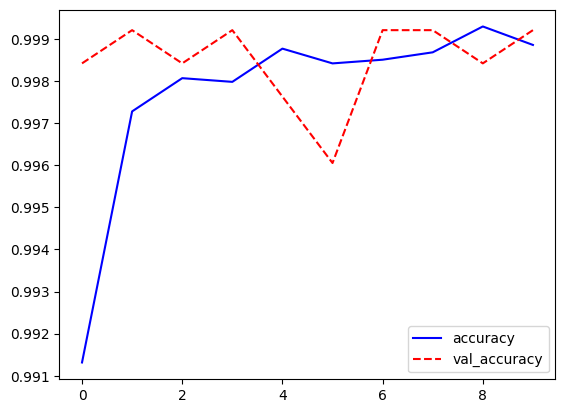

In [19]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

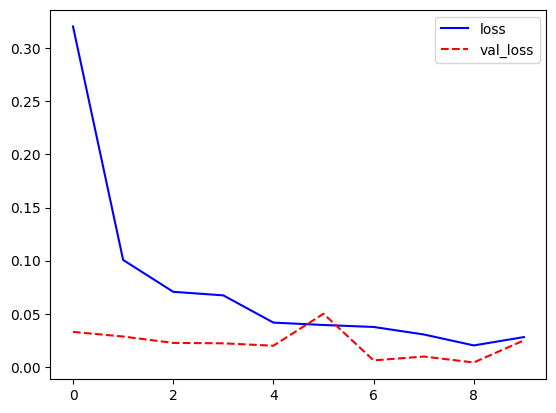

In [20]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

Early Stopping: 100번을 하기로 했어도 성능이 떨어지기 시작하면 일찍 멈춤

Checkpoint: 중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다

https://playground.tensorflow.org/

Q. 복잡할수록 정확도가 높아진다고 생각하는게 맞을까요?
복잡도: 얼마나 복잡하냐(모델의 특성)

정확도: 얼마나 잘 맞췄냐(결과)
A. 문제에 따라 다르다
- 단순해야 할 때는 단순하게
- 복잡해야 할 때는 복잡하게

Q. 혹시 자주 쓰는 트레이닝 모델이 있을까요?
모델을 보통은 직접 만들지 않음
있는 모델을 가져다 씀
- https://huggingface.co/ 참고
- ResNet
